# Tweets about eating disorders
## Modelling with CV
 

In [1]:
import os
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download
tweets = pd.read_csv('tweets2.csv', encoding='utf8', error_bad_lines=False)

In [2]:
tweets.head(2)

Unnamed: 0     id_tweet  stream_group  \
0           0  1,31851E+34             1   
1           1  1,31851E+34             1   

                                           text_orig  Commercial  POLITICS  \
0  RT @beatED: Learn more about anorexia and buli...           0         0   
1  A woman tries to balance her relationships wit...           0         0   

   ED  Family  ED_patience  ProED  Offensive  Informative  Scientific  Sad  \
0   1     0.0            0      0          0            1           0  0.0   
1   1     0.0            0      0          0            0           0  0.0   

                       hashtag  \
0              ['BBCPanorama']   
1  ['anorexia', 'BodyofWater']   

                                                text              Segmented#  
0  ['learn', 'anorexia', 'bulimia', 'well', 'eati...            bbc panorama  
1  ['woman', 'try', 'balance', 'relationship', 'm...  anorexia  bodyof water

In [3]:
tweets.columns=['num1','id_tw','stream_group','text_orig','f1_commercial','f2_politics','f3_ed','f4_family','f5_edpatient','f6_proed','f7_offensive','f8_info','f9_scientific','f10_sad','hashtag','text','segmented']

In [4]:
tweets.head(2)

num1        id_tw  stream_group  \
0     0  1,31851E+34             1   
1     1  1,31851E+34             1   

                                           text_orig  f1_commercial  \
0  RT @beatED: Learn more about anorexia and buli...              0   
1  A woman tries to balance her relationships wit...              0   

   f2_politics  f3_ed  f4_family  f5_edpatient  f6_proed  f7_offensive  \
0            0      1        0.0             0         0             0   
1            0      1        0.0             0         0             0   

   f8_info  f9_scientific  f10_sad                      hashtag  \
0        1              0      0.0              ['BBCPanorama']   
1        0              0      0.0  ['anorexia', 'BodyofWater']   

                                                text               segmented  
0  ['learn', 'anorexia', 'bulimia', 'well', 'eati...            bbc panorama  
1  ['woman', 'try', 'balance', 'relationship', 'm...  anorexia  bodyof water

In [5]:
cols=['f1_commercial','f2_politics','f3_ed','f4_family','f5_edpatient','f6_proed','f7_offensive','f8_info','f9_scientific','f10_sad']

In [6]:
for col in cols:
    print(tweets[col].value_counts(normalize=True)*100,'\n')

0    98.1
1     1.9
Name: f1_commercial, dtype: float64 

0    92.55
1     7.45
Name: f2_politics, dtype: float64 

1    87.65
0    12.35
Name: f3_ed, dtype: float64 

0.0    99.422966
1.0     0.577034
Name: f4_family, dtype: float64 

0    51.5
1    48.5
Name: f5_edpatient, dtype: float64 

0    76.65
1    23.35
Name: f6_proed, dtype: float64 

0    96.85
1     3.15
Name: f7_offensive, dtype: float64 

0    61.65
1    38.35
Name: f8_info, dtype: float64 

0    75.55
1    24.45
Name: f9_scientific, dtype: float64 

0.0    77.893519
1.0    15.393519
2.0     6.712963
Name: f10_sad, dtype: float64 



In [7]:
megaDF = pd.DataFrame()
megaDF.rename_axis('values')
cols2 = cols[:-1]
for col in cols2:
    df = tweets[col].value_counts(normalize=True).rename_axis('valores').to_frame(col)
    #df.plot.bar()
    #megaDF.concat([megaDF,df])
    megaDF = pd.concat([megaDF,df], axis=1)
    #plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'f1_commercial'),
  Text(1, 0, 'f2_politics'),
  Text(2, 0, 'f3_ed'),
  Text(3, 0, 'f4_family'),
  Text(4, 0, 'f5_edpatient'),
  Text(5, 0, 'f6_proed'),
  Text(6, 0, 'f7_offensive'),
  Text(7, 0, 'f8_info'),
  Text(8, 0, 'f9_scientific')])

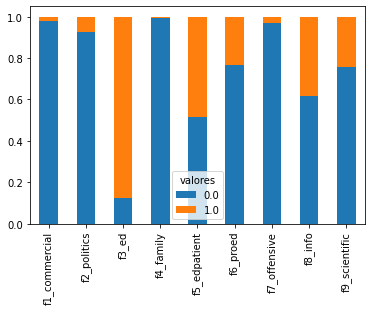

In [8]:
megaDF.T.plot.bar(stacked=True,rot=0)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'f5_edpatient'),
  Text(1, 0, 'f6_proed'),
  Text(2, 0, 'f8_info'),
  Text(3, 0, 'f9_scientific')])

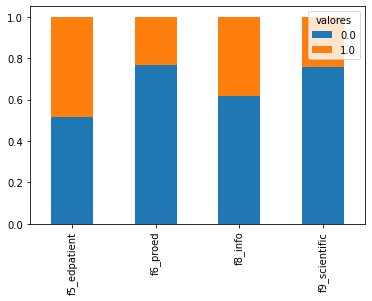

In [9]:
tweets1 = tweets.copy().drop(['f1_commercial', 'f2_politics', 'f3_ed', 'f4_family', 'f7_offensive', 'f10_sad'], axis=1)
megaDF=megaDF.drop(['f1_commercial', 'f2_politics', 'f3_ed', 'f4_family', 'f7_offensive'],axis=1)
megaDF.T.plot.bar(stacked=True,rot=0)
plt.xticks(rotation=90)

In [10]:
tweets1.head(2)

num1        id_tw  stream_group  \
0     0  1,31851E+34             1   
1     1  1,31851E+34             1   

                                           text_orig  f5_edpatient  f6_proed  \
0  RT @beatED: Learn more about anorexia and buli...             0         0   
1  A woman tries to balance her relationships wit...             0         0   

   f8_info  f9_scientific                      hashtag  \
0        1              0              ['BBCPanorama']   
1        0              0  ['anorexia', 'BodyofWater']   

                                                text               segmented  
0  ['learn', 'anorexia', 'bulimia', 'well', 'eati...            bbc panorama  
1  ['woman', 'try', 'balance', 'relationship', 'm...  anorexia  bodyof water

In [11]:
import pandas as pd
import numpy as np

import spacy
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import regex as re
import string
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from simpletransformers.classification import ClassificationModel


import io

In [12]:
punctuations = "¡!#$%&'()*+,-./:;<=>¿?@[\]^_`{|}~"

def read_txt(filename):
    list = []
    with open(filename, 'r', encoding='utf-8') as f:
        data = f.readlines()
        for line in data:
            list.append(str(line).replace('\n', ''))
    return list

stopwords = read_txt('spanish_stopwords.txt')

stemmer = SnowballStemmer('spanish')


def clean_accents(tweet):
    tweet = re.sub(r"[àáâãäå]", "a", tweet)
    tweet = re.sub(r"ç", "c", tweet)
    tweet = re.sub(r"[èéêë]", "e", tweet)
    tweet = re.sub(r"[ìíîï]", "i", tweet)
    tweet = re.sub(r"[òóôõö]", "o", tweet)
    tweet = re.sub(r"[ùúûü]", "u", tweet)
    tweet = re.sub(r"[ýÿ]", "y", tweet)

    return tweet

def clean_tweet(tweet, stem = False):
    tweet = tweet.lower().strip()
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    tweet = re.sub(r'http?:\/\/\S+', '', tweet)
    tweet = re.sub(r'www?:\/\/\S+', '', tweet)
    tweet = re.sub(r'\s([@#][\w_-]+)', "", tweet)
    tweet = re.sub(r"\n", " ", tweet)
    tweet = clean_accents(tweet)
    tweet = re.sub(r"\b(a*ha+h[ha]*|o?l+o+l+[ol]*|x+d+[x*d*]*|a*ja+[j+a+]+)\b", "<risas>", tweet)
    for symbol in punctuations:
        tweet = tweet.replace(symbol, "")
    tokens = []
    for token in tweet.strip().split():
        if token not in punctuations and token not in stopwords:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [13]:
tweets1['text_cleaned'] = tweets['text_orig'].apply(lambda s : clean_tweet(s))
print(tweets1['text_cleaned'].head(5))

0                                                                                           rt learn more about anorexia and bulimia as well as other eating disorders here
1    woman tries to balance her relationships with her mother and teenage daughter while under the shadow of in the atmospheric british drama at depot from friday book now
2                                              not full on diagnosis but like my therapist legit told my mom i have anorexia nevrususu and my poor mom sat there like 👁👄👁oh
3                                                                                         highercalorie diets for patients with anorexia nervosa shorten hospital stays via
4               tw ed ment freddie pissed off but it was amazing but the way they got the anorexic bulimic actress to play foodobsessed character will never sit right with
Name: text_cleaned, dtype: object


In [14]:
tweets1.head(2)

num1        id_tw  stream_group  \
0     0  1,31851E+34             1   
1     1  1,31851E+34             1   

                                                                                                                                                                                                                                            text_orig  \
0                                                                                                       RT @beatED: Learn more about anorexia and bulimia, as well as other eating disorders, here: https://t.co/Aj2HbjRH39 @BBCPanorama #BBCPanorama   
1  A woman tries to balance her relationships with her mother and teenage daughter while under the shadow of #anorexia in the atmospheric British drama #BodyofWater. \n\nAt Depot from Friday, book now: https://lewesdepot.org/film/body-of-water\n   

   f5_edpatient  f6_proed  f8_info  f9_scientific  \
0             0         0        1              0   
1             0         0        0              0   

                       hashtag  \
0              ['BBCPanorama']   
1  ['anorexia', 'BodyofWater']   

                                                                                                                                                   text  \
0                                                                                        ['learn', 'anorexia', 'bulimia', 'well', 'eating', 'disorder']   
1  ['woman', 'try', 'balance', 'relationship', 'mother', 'teenage', 'daughter', 'shadow', 'atmospheric', 'british', 'drama', 'depot', 'friday', 'book']   

                segmented  \
0            bbc panorama   
1  anorexia  bodyof water   

                                                                                                                                                             text_cleaned  
0                                                                                         rt learn more about anorexia and bulimia as well as other eating disorders here  
1  woman tries to balance her relationships with her mother and teenage daughter while under the shadow of in the atmospheric british drama at depot from friday book now

In [15]:
df = tweets1.copy()
X = df['text_cleaned']
Y1 = df['f5_edpatient']
Y2 = df['f6_proed']
Y3 = df['f8_info']
Y4 = df['f9_scientific']

In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, Y3, test_size=0.3, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X, Y4, test_size=0.3, random_state=42)

In [17]:
y1_test.value_counts(normalize=True)

0    0.533333
1    0.466667
Name: f5_edpatient, dtype: float64

In [18]:
train_args ={"reprocess_input_data": True,
           "fp16":False,
             "evaluate_during_training": False,
             "evaluate_during_training_verbose":False,
             "learning_rate":2e-5,
             "train_batch_size":32,
             "eval_batch_size":32,
           "num_train_epochs": 15, 'overwrite_output_dir': True, "evaluation_strategy":'epochs'
            }
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')

def calcule_f1(df):
    return(df['tp'] / (df['tp'] + 0.5 * (df['fp'] + df['fn'])))

import torch
import gc
from tqdm import tqdm


dfEval1 = pd.DataFrame()

In [19]:
indexBERT = ['BERT','RoBERTa','DistilBERT','CamemBERT','Albert','FlauBERT']

train_df1 = pd.DataFrame({ 'text_cleaned': X1_train, 'target': y1_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X1_test, 'target': y1_test })

train_df2 = pd.DataFrame({ 'text_cleaned': X2_train, 'target': y2_train })
test_df2 = pd.DataFrame({ 'text_cleaned': X2_test, 'target': y2_test })

train_df3 = pd.DataFrame({ 'text_cleaned': X3_train, 'target': y3_train })
test_df3 = pd.DataFrame({ 'text_cleaned': X3_test, 'target': y3_test })

train_df4 = pd.DataFrame({ 'text_cleaned': X4_train, 'target': y4_train })
test_df4 = pd.DataFrame({ 'text_cleaned': X4_test, 'target': y4_test })

'''
model1 = ClassificationModel(
"bert", "bert-base-multilingual-cased",
    use_cuda = True,
    args=train_args
)
train_df1 = pd.DataFrame({ 'text_cleaned': X1_train, 'target': y1_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X1_test, 'target': y1_test })

model1.train_model(train_df1)
result1, model_outputs1, wrong_predictions1 = model1.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
print(result1)
#torch.save(model1, 'model1'+str(i)+'.pt')
del model1
gc.collect()
torch.cuda.empty_cache()
'''


'\nmodel1 = ClassificationModel(\n"bert", "bert-base-multilingual-cased",\n    use_cuda = True,\n    args=train_args\n)\ntrain_df1 = pd.DataFrame({ \'text_cleaned\': X1_train, \'target\': y1_train })\ntest_df1 = pd.DataFrame({ \'text_cleaned\': X1_test, \'target\': y1_test })\n\nmodel1.train_model(train_df1)\nresult1, model_outputs1, wrong_predictions1 = model1.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)\nprint(result1)\n#torch.save(model1, \'model1\'+str(i)+\'.pt\')\ndel model1\ngc.collect()\ntorch.cuda.empty_cache()\n'

In [20]:
# dfResultsModels2 = pd.DataFrame.from_dict(result1, orient="index").T

In [21]:
#dfResultsModels = dfResultsModels.append(dfResultsModels2)
#dfResultsModels

In [22]:
#pd.DataFrame(dfResultsModels.mean(axis=0)).T

In [20]:
N_ITER = 1

In [21]:
gc.collect()
torch.cuda.empty_cache()

In [22]:
'''
torch.load(model1, 'model1.pt')
model1.train_model(train_df1)
result1, model_outputs1, wrong_predictions1 = model1.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
print(result1)
del model1
gc.collect()
'''
#gc.collect()
#torch.cuda.empty_cache()
limitsave=0
train_df1 = pd.DataFrame({ 'text_cleaned': X1_train, 'target': y1_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X1_test, 'target': y1_test })

'''
train_df1 = pd.DataFrame({ 'text_cleaned': X2_train, 'target': y2_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X2_test, 'target': y2_test })

train_df1 = pd.DataFrame({ 'text_cleaned': X3_train, 'target': y3_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X3_test, 'target': y3_test })

train_df1 = pd.DataFrame({ 'text_cleaned': X4_train, 'target': y4_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X4_test, 'target': y4_test })
'''

for i in range(0,N_ITER):
    model1 = ClassificationModel(
    "bert", "bert-base-multilingual-cased",
        use_cuda = True,
        args=train_args
    )
    model1.train_model(train_df1)
    result1, model_outputs1, wrong_predictions1 = model1.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1)
    if(i<limitsave):
        torch.save(model1, 'model1'+str(i)+'.pt')
    del model1
    gc.collect()
    torch.cuda.empty_cache()
    if(i==0):
        dfResultsModels1 = pd.DataFrame.from_dict(result1, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1, orient="index").T
        dfResultsModels1 = dfResultsModels1.append(dfResultsModels1b)
        
dfResultsModels1Trans = pd.DataFrame(dfResultsModels1.mean(axis=0)).T
dfResultsModels1Trans['f1'] = calcule_f1(dfResultsModels1Trans)

dfResultsModelsTotal = dfResultsModels1Trans.copy()
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-1.csv')

#dfResultsModelsTotal = pd.read_csv('dfResultsModelsTotal.csv', encoding='utf8', error_bad_lines=False)
        
for i in range(0,N_ITER):
    model1c = ClassificationModel(
    "roberta", "roberta-base",
        use_cuda = True,
        args=train_args
    )
    model1c.train_model(train_df1)

    result1c, model_outputs1c, wrong_predictions1c = model1c.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1c)
    if(i<limitsave):
        torch.save(model1c, 'model1c'+str(i)+'.pt')
    del model1c
    gc.collect()
    if(i==0):
        dfResultsModels1c = pd.DataFrame.from_dict(result1c, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1c, orient="index").T
        dfResultsModels1c = dfResultsModels1c.append(dfResultsModels1b)

dfResultsModels1cTrans = pd.DataFrame(dfResultsModels1c.mean(axis=0)).T
dfResultsModels1cTrans['f1'] = calcule_f1(dfResultsModels1cTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1cTrans)
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-1.csv')



for i in range(0,N_ITER):
    model1d = ClassificationModel(
    "distilbert", "distilbert-base-cased",
        use_cuda = True,
        args=train_args
    )
    model1d.train_model(train_df1)

    result1d, model_outputs1d, wrong_predictions1d = model1d.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1d)
    if(i<limitsave):
        torch.save(model1d, 'model1d'+str(i)+'.pt')
    del model1d
    gc.collect()
    if(i==0):
        dfResultsModels1d = pd.DataFrame.from_dict(result1d, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1d, orient="index").T
        dfResultsModels1d = dfResultsModels1d.append(dfResultsModels1b)

dfResultsModels1dTrans = pd.DataFrame(dfResultsModels1d.mean(axis=0)).T
dfResultsModels1dTrans['f1'] = calcule_f1(dfResultsModels1dTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1dTrans)

dfResultsModelsTotal.to_csv('dfResultsModelsTotal-1.csv')



for i in range(0,N_ITER):
    model1e = ClassificationModel(
    "camembert", "camembert-base",
        use_cuda = True,
        args=train_args
    )
    model1e.train_model(train_df1)

    result1e, model_outputs1e, wrong_predictions1e = model1e.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1e)
    if(i<limitsave):
        torch.save(model1e, 'model1e'+str(i)+'.pt')
    del model1e
    gc.collect()
    if(i==0):
        dfResultsModels1e = pd.DataFrame.from_dict(result1e, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1e, orient="index").T
        dfResultsModels1e = dfResultsModels1e.append(dfResultsModels1b)

dfResultsModels1eTrans = pd.DataFrame(dfResultsModels1e.mean(axis=0)).T
dfResultsModels1eTrans['f1'] = calcule_f1(dfResultsModels1eTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1eTrans)

dfResultsModelsTotal.to_csv('dfResultsModelsTotal-1.csv')


for i in range(0,N_ITER):
    model1f = ClassificationModel(
    "albert", "albert-base-v1",
        use_cuda = True,
        args=train_args
    )
    model1f.train_model(train_df1)

    result1f, model_outputs1f, wrong_predictions1f = model1f.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1f)
    if(i<limitsave):
        torch.save(model1f, 'model1f'+str(i)+'.pt')
    del model1f
    gc.collect()
    if(i==0):
        dfResultsModels1f = pd.DataFrame.from_dict(result1f, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1f, orient="index").T
        dfResultsModels1f = dfResultsModels1f.append(dfResultsModels1b)

dfResultsModels1fTrans = pd.DataFrame(dfResultsModels1f.mean(axis=0)).T
dfResultsModels1fTrans['f1'] = calcule_f1(dfResultsModels1fTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1fTrans)
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-1.csv')



for i in range(0,N_ITER):
    model1g = ClassificationModel(
    "flaubert","flaubert/flaubert_base_cased",
        use_cuda = True,
        args=train_args
    )
    model1g.train_model(train_df1)

    result1g, model_outputs1g, wrong_predictions1g = model1g.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1g)
    if(i<limitsave):
        torch.save(model1g, 'model1g'+str(i)+'.pt')
    del model1g
    gc.collect()
    if(i==0):
        dfResultsModels1g = pd.DataFrame.from_dict(result1g, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1g, orient="index").T
        dfResultsModels1g = dfResultsModels1g.append(dfResultsModels1b)

dfResultsModels1gTrans = pd.DataFrame(dfResultsModels1g.mean(axis=0)).T
dfResultsModels1gTrans['f1'] = calcule_f1(dfResultsModels1gTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1gTrans)
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-1.csv')



Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

C:\Users\MICROSOFT\Anaconda3\envs\tfm2\lib\site-packages\simpletransformers\classification\classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.7125821199537189, 'tp': 240, 'tn': 274, 'fp': 46, 'fn': 40, 'auroc': 0.9246149553571428, 'auprc': 0.9054694575758212, 'f1': 0.8566666666666667, 'acc': 0.8566666666666667, 'eval_loss': 0.9413808748910302}


Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.7401314093289127, 'tp': 247, 'tn': 275, 'fp': 45, 'fn': 33, 'auroc': 0.9286216517857142, 'auprc': 0.8940643632991042, 'f1': 0.87, 'acc': 0.87, 'eval_loss': 0.9732028089071575}


Downloading:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.6787300638893413, 'tp': 233, 'tn': 271, 'fp': 49, 'fn': 47, 'auroc': 0.8910100446428572, 'auprc': 0.8525270979405933, 'f1': 0.8399999999999999, 'acc': 0.84, 'eval_loss': 0.8221388929768613}


Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'cl

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.7023602819495106, 'tp': 225, 'tn': 286, 'fp': 34, 'fn': 55, 'auroc': 0.9146930803571429, 'auprc': 0.9030916365215786, 'f1': 0.8516666666666667, 'acc': 0.8516666666666667, 'eval_loss': 0.5645891224083147}


Some weights of the model checkpoint at albert-base-v1 were not used when initializing AlbertForSequenceClassification: ['predictions.bias', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You sho

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.6614834162237766, 'tp': 226, 'tn': 273, 'fp': 47, 'fn': 54, 'auroc': 0.893197544642857, 'auprc': 0.8645988119086377, 'f1': 0.8316666666666667, 'acc': 0.8316666666666667, 'eval_loss': 0.9176747030333469}


Downloading:   0%|          | 0.00/553M [00:00<?, ?B/s]

Some weights of the model checkpoint at flaubert/flaubert_base_cased were not used when initializing FlaubertForSequenceClassification: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of FlaubertForSequenceClassification were not initialized from the model checkpoint at flaubert/flaubert_base_cased and are newly initialized: ['position_embeddings.weight', 'embeddings.weight', 'layer_norm_emb.weight', 'layer_norm_emb.bias', 'attentions.0.q_lin.weight', 'attentions.0.q_lin.bias', 

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.6883031031753994, 'tp': 229, 'tn': 278, 'fp': 42, 'fn': 51, 'auroc': 0.8951841517857142, 'auprc': 0.8830031992621106, 'f1': 0.845, 'acc': 0.845, 'eval_loss': 0.8026676836766695}


In [27]:
indexBERT = ['BERT','RoBERTa','DistilBERT','CamemBERT','Albert','Flaubert']

#dfResultsModelsTotal.reindex(indexBERT)
dfResultsModelsTotal = dfResultsModelsTotal.reset_index(drop=True)
dfResultsModelsTotal.index = indexBERT
dfResultsModelsTotal

dfResultssModelsTotal1 = dfResultsModelsTotal.copy()

dfResultssModelsTotal1

mcc     tp     tn    fp    fn     auroc     auprc        f1  \
BERT        0.680467   94.0  442.0  25.0  39.0  0.941218  0.859753  0.746032   
RoBERTa     0.766940  108.0  444.0  23.0  25.0  0.954984  0.873154  0.818182   
DistilBERT  0.718376  103.0  439.0  28.0  30.0  0.940783  0.792160  0.780303   
CamemBERT   0.703988   95.0  446.0  21.0  38.0  0.959299  0.836378  0.763052   
Albert      0.640215   90.0  438.0  29.0  43.0  0.937193  0.829862  0.714286   
Flaubert    0.721388  105.0  437.0  30.0  28.0  0.953486  0.857952  0.783582   

                 acc  eval_loss  
BERT        0.893333   0.588485  
RoBERTa     0.920000   0.565434  
DistilBERT  0.903333   0.526942  
CamemBERT   0.901667   0.382991  
Albert      0.880000   0.702584  
Flaubert    0.903333   0.302684

In [23]:
'''
torch.load(model1, 'model1.pt')
model1.train_model(train_df1)
result1, model_outputs1, wrong_predictions1 = model1.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
print(result1)
del model1
gc.collect()
'''
#gc.collect()
#torch.cuda.empty_cache()
limitsave=0

'''
train_df1 = pd.DataFrame({ 'text_cleaned': X1_train, 'target': y1_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X1_test, 'target': y1_test })
'''

train_df1 = pd.DataFrame({ 'text_cleaned': X2_train, 'target': y2_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X2_test, 'target': y2_test })
'''
train_df1 = pd.DataFrame({ 'text_cleaned': X3_train, 'target': y3_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X3_test, 'target': y3_test })

train_df1 = pd.DataFrame({ 'text_cleaned': X4_train, 'target': y4_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X4_test, 'target': y4_test })
'''

for i in range(0,N_ITER):
    model1 = ClassificationModel(
    "bert", "bert-base-multilingual-cased",
        use_cuda = True,
        args=train_args
    )
    model1.train_model(train_df1)
    result1, model_outputs1, wrong_predictions1 = model1.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1)
    if(i<limitsave):
        torch.save(model1, 'model1'+str(i)+'.pt')
    del model1
    gc.collect()
    torch.cuda.empty_cache()
    if(i==0):
        dfResultsModels1 = pd.DataFrame.from_dict(result1, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1, orient="index").T
        dfResultsModels1 = dfResultsModels1.append(dfResultsModels1b)
        
dfResultsModels1Trans = pd.DataFrame(dfResultsModels1.mean(axis=0)).T
dfResultsModels1Trans['f1'] = calcule_f1(dfResultsModels1Trans)

dfResultsModelsTotal = dfResultsModels1Trans.copy()
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-2.csv')

#dfResultsModelsTotal = pd.read_csv('dfResultsModelsTotal.csv', encoding='utf8', error_bad_lines=False)
        
for i in range(0,N_ITER):
    model1c = ClassificationModel(
    "roberta", "roberta-base",
        use_cuda = True,
        args=train_args
    )
    model1c.train_model(train_df1)

    result1c, model_outputs1c, wrong_predictions1c = model1c.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1c)
    if(i<limitsave):
        torch.save(model1c, 'model1c'+str(i)+'.pt')
    del model1c
    gc.collect()
    if(i==0):
        dfResultsModels1c = pd.DataFrame.from_dict(result1c, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1c, orient="index").T
        dfResultsModels1c = dfResultsModels1c.append(dfResultsModels1b)

dfResultsModels1cTrans = pd.DataFrame(dfResultsModels1c.mean(axis=0)).T
dfResultsModels1cTrans['f1'] = calcule_f1(dfResultsModels1cTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1cTrans)
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-2.csv')



for i in range(0,N_ITER):
    model1d = ClassificationModel(
    "distilbert", "distilbert-base-cased",
        use_cuda = True,
        args=train_args
    )
    model1d.train_model(train_df1)

    result1d, model_outputs1d, wrong_predictions1d = model1d.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1d)
    if(i<limitsave):
        torch.save(model1d, 'model1d'+str(i)+'.pt')
    del model1d
    gc.collect()
    if(i==0):
        dfResultsModels1d = pd.DataFrame.from_dict(result1d, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1d, orient="index").T
        dfResultsModels1d = dfResultsModels1d.append(dfResultsModels1b)

dfResultsModels1dTrans = pd.DataFrame(dfResultsModels1d.mean(axis=0)).T
dfResultsModels1dTrans['f1'] = calcule_f1(dfResultsModels1dTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1dTrans)

dfResultsModelsTotal.to_csv('dfResultsModelsTotal-2.csv')



for i in range(0,N_ITER):
    model1e = ClassificationModel(
    "camembert", "camembert-base",
        use_cuda = True,
        args=train_args
    )
    model1e.train_model(train_df1)

    result1e, model_outputs1e, wrong_predictions1e = model1e.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1e)
    if(i<limitsave):
        torch.save(model1e, 'model1e'+str(i)+'.pt')
    del model1e
    gc.collect()
    if(i==0):
        dfResultsModels1e = pd.DataFrame.from_dict(result1e, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1e, orient="index").T
        dfResultsModels1e = dfResultsModels1e.append(dfResultsModels1b)

dfResultsModels1eTrans = pd.DataFrame(dfResultsModels1e.mean(axis=0)).T
dfResultsModels1eTrans['f1'] = calcule_f1(dfResultsModels1eTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1eTrans)

dfResultsModelsTotal.to_csv('dfResultsModelsTotal-2.csv')


for i in range(0,N_ITER):
    model1f = ClassificationModel(
    "albert", "albert-base-v1",
        use_cuda = True,
        args=train_args
    )
    model1f.train_model(train_df1)

    result1f, model_outputs1f, wrong_predictions1f = model1f.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1f)
    if(i<limitsave):
        torch.save(model1f, 'model1f'+str(i)+'.pt')
    del model1f
    gc.collect()
    if(i==0):
        dfResultsModels1f = pd.DataFrame.from_dict(result1f, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1f, orient="index").T
        dfResultsModels1f = dfResultsModels1f.append(dfResultsModels1b)

dfResultsModels1fTrans = pd.DataFrame(dfResultsModels1f.mean(axis=0)).T
dfResultsModels1fTrans['f1'] = calcule_f1(dfResultsModels1fTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1fTrans)
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-2.csv')



for i in range(0,N_ITER):
    model1g = ClassificationModel(
    "flaubert","flaubert/flaubert_base_cased",
        use_cuda = True,
        args=train_args
    )
    model1g.train_model(train_df1)

    result1g, model_outputs1g, wrong_predictions1g = model1g.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1g)
    if(i<limitsave):
        torch.save(model1g, 'model1g'+str(i)+'.pt')
    del model1g
    gc.collect()
    if(i==0):
        dfResultsModels1g = pd.DataFrame.from_dict(result1g, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1g, orient="index").T
        dfResultsModels1g = dfResultsModels1g.append(dfResultsModels1b)

dfResultsModels1gTrans = pd.DataFrame(dfResultsModels1g.mean(axis=0)).T
dfResultsModels1gTrans['f1'] = calcule_f1(dfResultsModels1gTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1gTrans)
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-2.csv')



Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.6804666441154533, 'tp': 94, 'tn': 442, 'fp': 25, 'fn': 39, 'auroc': 0.9412181417140281, 'auprc': 0.859752732054035, 'f1': 0.8933333333333333, 'acc': 0.8933333333333333, 'eval_loss': 0.5884849820806841}


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.7669397136369968, 'tp': 108, 'tn': 444, 'fp': 23, 'fn': 25, 'auroc': 0.9549838192912689, 'auprc': 0.873153799511355, 'f1': 0.92, 'acc': 0.92, 'eval_loss': 0.5654342046105548}


Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.7183756605962599, 'tp': 103, 'tn': 439, 'fp': 28, 'fn': 30, 'auroc': 0.9407834361063258, 'auprc': 0.7921601549353562, 'f1': 0.9033333333333333, 'acc': 0.9033333333333333, 'eval_loss': 0.5269416707635269}


Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'cl

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.7039875559775932, 'tp': 95, 'tn': 446, 'fp': 21, 'fn': 38, 'auroc': 0.9592986749529069, 'auprc': 0.8363776108758486, 'f1': 0.9016666666666667, 'acc': 0.9016666666666666, 'eval_loss': 0.38299128045573044}


Some weights of the model checkpoint at albert-base-v1 were not used when initializing AlbertForSequenceClassification: ['predictions.bias', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You sho

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.640215246735987, 'tp': 90, 'tn': 438, 'fp': 29, 'fn': 43, 'auroc': 0.9371930897908584, 'auprc': 0.8298615465356246, 'f1': 0.88, 'acc': 0.88, 'eval_loss': 0.7025844407709021}


Some weights of the model checkpoint at flaubert/flaubert_base_cased were not used when initializing FlaubertForSequenceClassification: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of FlaubertForSequenceClassification were not initialized from the model checkpoint at flaubert/flaubert_base_cased and are newly initialized: ['position_embeddings.weight', 'embeddings.weight', 'layer_norm_emb.weight', 'layer_norm_emb.bias', 'attentions.0.q_lin.weight', 'attentions.0.q_lin.bias', 

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.7213880931315745, 'tp': 105, 'tn': 437, 'fp': 30, 'fn': 28, 'auroc': 0.9534864999758497, 'auprc': 0.8579517607376339, 'f1': 0.9033333333333333, 'acc': 0.9033333333333333, 'eval_loss': 0.3026840605429913}


In [29]:

#dfResultsModelsTotal.reindex(indexBERT)
dfResultsModelsTotal = dfResultsModelsTotal.reset_index(drop=True)
dfResultsModelsTotal.index = indexBERT
dfResultsModelsTotal

dfResultssModelsTotal2 = dfResultsModelsTotal.copy()

dfResultssModelsTotal2

mcc     tp     tn    fp    fn     auroc     auprc        f1  \
BERT        0.680467   94.0  442.0  25.0  39.0  0.941218  0.859753  0.746032   
RoBERTa     0.766940  108.0  444.0  23.0  25.0  0.954984  0.873154  0.818182   
DistilBERT  0.718376  103.0  439.0  28.0  30.0  0.940783  0.792160  0.780303   
CamemBERT   0.703988   95.0  446.0  21.0  38.0  0.959299  0.836378  0.763052   
Albert      0.640215   90.0  438.0  29.0  43.0  0.937193  0.829862  0.714286   
Flaubert    0.721388  105.0  437.0  30.0  28.0  0.953486  0.857952  0.783582   

                 acc  eval_loss  
BERT        0.893333   0.588485  
RoBERTa     0.920000   0.565434  
DistilBERT  0.903333   0.526942  
CamemBERT   0.901667   0.382991  
Albert      0.880000   0.702584  
Flaubert    0.903333   0.302684

In [30]:
'''
torch.load(model1, 'model1.pt')
model1.train_model(train_df1)
result1, model_outputs1, wrong_predictions1 = model1.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
print(result1)
del model1
gc.collect()
'''
#gc.collect()
#torch.cuda.empty_cache()
limitsave=0

'''
train_df1 = pd.DataFrame({ 'text_cleaned': X1_train, 'target': y1_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X1_test, 'target': y1_test })


train_df1 = pd.DataFrame({ 'text_cleaned': X2_train, 'target': y2_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X2_test, 'target': y2_test })
'''
train_df1 = pd.DataFrame({ 'text_cleaned': X3_train, 'target': y3_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X3_test, 'target': y3_test })
'''
train_df1 = pd.DataFrame({ 'text_cleaned': X4_train, 'target': y4_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X4_test, 'target': y4_test })
'''

for i in range(0,N_ITER):
    model1 = ClassificationModel(
    "bert", "bert-base-multilingual-cased",
        use_cuda = True,
        args=train_args
    )
    model1.train_model(train_df1)
    result1, model_outputs1, wrong_predictions1 = model1.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1)
    if(i<limitsave):
        torch.save(model1, 'model1'+str(i)+'.pt')
    del model1
    gc.collect()
    torch.cuda.empty_cache()
    if(i==0):
        dfResultsModels1 = pd.DataFrame.from_dict(result1, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1, orient="index").T
        dfResultsModels1 = dfResultsModels1.append(dfResultsModels1b)
        
dfResultsModels1Trans = pd.DataFrame(dfResultsModels1.mean(axis=0)).T
dfResultsModels1Trans['f1'] = calcule_f1(dfResultsModels1Trans)

dfResultsModelsTotal = dfResultsModels1Trans.copy()
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-3.csv')

#dfResultsModelsTotal = pd.read_csv('dfResultsModelsTotal.csv', encoding='utf8', error_bad_lines=False)
        
for i in range(0,N_ITER):
    model1c = ClassificationModel(
    "roberta", "roberta-base",
        use_cuda = True,
        args=train_args
    )
    model1c.train_model(train_df1)

    result1c, model_outputs1c, wrong_predictions1c = model1c.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1c)
    if(i<limitsave):
        torch.save(model1c, 'model1c'+str(i)+'.pt')
    del model1c
    gc.collect()
    if(i==0):
        dfResultsModels1c = pd.DataFrame.from_dict(result1c, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1c, orient="index").T
        dfResultsModels1c = dfResultsModels1c.append(dfResultsModels1b)

dfResultsModels1cTrans = pd.DataFrame(dfResultsModels1c.mean(axis=0)).T
dfResultsModels1cTrans['f1'] = calcule_f1(dfResultsModels1cTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1cTrans)
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-3.csv')



for i in range(0,N_ITER):
    model1d = ClassificationModel(
    "distilbert", "distilbert-base-cased",
        use_cuda = True,
        args=train_args
    )
    model1d.train_model(train_df1)

    result1d, model_outputs1d, wrong_predictions1d = model1d.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1d)
    if(i<limitsave):
        torch.save(model1d, 'model1d'+str(i)+'.pt')
    del model1d
    gc.collect()
    if(i==0):
        dfResultsModels1d = pd.DataFrame.from_dict(result1d, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1d, orient="index").T
        dfResultsModels1d = dfResultsModels1d.append(dfResultsModels1b)

dfResultsModels1dTrans = pd.DataFrame(dfResultsModels1d.mean(axis=0)).T
dfResultsModels1dTrans['f1'] = calcule_f1(dfResultsModels1dTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1dTrans)

dfResultsModelsTotal.to_csv('dfResultsModelsTotal-3.csv')



for i in range(0,N_ITER):
    model1e = ClassificationModel(
    "camembert", "camembert-base",
        use_cuda = True,
        args=train_args
    )
    model1e.train_model(train_df1)

    result1e, model_outputs1e, wrong_predictions1e = model1e.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1e)
    if(i<limitsave):
        torch.save(model1e, 'model1e'+str(i)+'.pt')
    del model1e
    gc.collect()
    if(i==0):
        dfResultsModels1e = pd.DataFrame.from_dict(result1e, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1e, orient="index").T
        dfResultsModels1e = dfResultsModels1e.append(dfResultsModels1b)

dfResultsModels1eTrans = pd.DataFrame(dfResultsModels1e.mean(axis=0)).T
dfResultsModels1eTrans['f1'] = calcule_f1(dfResultsModels1eTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1eTrans)

dfResultsModelsTotal.to_csv('dfResultsModelsTotal-3.csv')


for i in range(0,N_ITER):
    model1f = ClassificationModel(
    "albert", "albert-base-v1",
        use_cuda = True,
        args=train_args
    )
    model1f.train_model(train_df1)

    result1f, model_outputs1f, wrong_predictions1f = model1f.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1f)
    if(i<limitsave):
        torch.save(model1f, 'model1f'+str(i)+'.pt')
    del model1f
    gc.collect()
    if(i==0):
        dfResultsModels1f = pd.DataFrame.from_dict(result1f, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1f, orient="index").T
        dfResultsModels1f = dfResultsModels1f.append(dfResultsModels1b)

dfResultsModels1fTrans = pd.DataFrame(dfResultsModels1f.mean(axis=0)).T
dfResultsModels1fTrans['f1'] = calcule_f1(dfResultsModels1fTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1fTrans)
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-3.csv')



for i in range(0,N_ITER):
    model1g = ClassificationModel(
    "flaubert","flaubert/flaubert_base_cased",
        use_cuda = True,
        args=train_args
    )
    model1g.train_model(train_df1)

    result1g, model_outputs1g, wrong_predictions1g = model1g.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1g)
    if(i<limitsave):
        torch.save(model1g, 'model1g'+str(i)+'.pt')
    del model1g
    gc.collect()
    if(i==0):
        dfResultsModels1g = pd.DataFrame.from_dict(result1g, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1g, orient="index").T
        dfResultsModels1g = dfResultsModels1g.append(dfResultsModels1b)

dfResultsModels1gTrans = pd.DataFrame(dfResultsModels1g.mean(axis=0)).T
dfResultsModels1gTrans['f1'] = calcule_f1(dfResultsModels1gTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1gTrans)
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-3.csv')



Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

C:\Users\MICROSOFT\Anaconda3\envs\tfm2\lib\site-packages\simpletransformers\classification\classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.687142707500405, 'tp': 194, 'tn': 316, 'fp': 43, 'fn': 47, 'auroc': 0.8969359331476322, 'auprc': 0.870660833085849, 'f1': 0.85, 'acc': 0.85, 'eval_loss': 0.8461961993016303}


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.7383794874099359, 'tp': 197, 'tn': 328, 'fp': 31, 'fn': 44, 'auroc': 0.9143771888255758, 'auprc': 0.9065378731932237, 'f1': 0.875, 'acc': 0.875, 'eval_loss': 0.8846329952541151}


Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.6995273003620833, 'tp': 183, 'tn': 331, 'fp': 28, 'fn': 58, 'auroc': 0.9039517331453206, 'auprc': 0.8925897850155664, 'f1': 0.8566666666666667, 'acc': 0.8566666666666667, 'eval_loss': 0.7765977931650061}


Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'cl

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.7418848022593254, 'tp': 208, 'tn': 317, 'fp': 42, 'fn': 33, 'auroc': 0.9166425871773831, 'auprc': 0.9073782877318629, 'f1': 0.875, 'acc': 0.875, 'eval_loss': 0.44313280715754155}


Some weights of the model checkpoint at albert-base-v1 were not used when initializing AlbertForSequenceClassification: ['predictions.bias', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You sho

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.6579658556319247, 'tp': 186, 'tn': 316, 'fp': 43, 'fn': 55, 'auroc': 0.8971670962447554, 'auprc': 0.8764506305707795, 'f1': 0.8366666666666667, 'acc': 0.8366666666666667, 'eval_loss': 0.9671129929391962}


Some weights of the model checkpoint at flaubert/flaubert_base_cased were not used when initializing FlaubertForSequenceClassification: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of FlaubertForSequenceClassification were not initialized from the model checkpoint at flaubert/flaubert_base_cased and are newly initialized: ['position_embeddings.weight', 'embeddings.weight', 'layer_norm_emb.weight', 'layer_norm_emb.bias', 'attentions.0.q_lin.weight', 'attentions.0.q_lin.bias', 

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.6655581323959822, 'tp': 189, 'tn': 315, 'fp': 44, 'fn': 52, 'auroc': 0.9028652665888417, 'auprc': 0.8889469049427654, 'f1': 0.8399999999999999, 'acc': 0.84, 'eval_loss': 0.6985738453896422}


In [31]:

#dfResultsModelsTotal.reindex(indexBERT)
dfResultsModelsTotal = dfResultsModelsTotal.reset_index(drop=True)
dfResultsModelsTotal.index = indexBERT
dfResultsModelsTotal

dfResultssModelsTotal3 = dfResultsModelsTotal.copy()

dfResultssModelsTotal3

mcc     tp     tn    fp    fn     auroc     auprc        f1  \
BERT        0.687143  194.0  316.0  43.0  47.0  0.896936  0.870661  0.811715   
RoBERTa     0.738379  197.0  328.0  31.0  44.0  0.914377  0.906538  0.840085   
DistilBERT  0.699527  183.0  331.0  28.0  58.0  0.903952  0.892590  0.809735   
CamemBERT   0.741885  208.0  317.0  42.0  33.0  0.916643  0.907378  0.847251   
Albert      0.657966  186.0  316.0  43.0  55.0  0.897167  0.876451  0.791489   
Flaubert    0.665558  189.0  315.0  44.0  52.0  0.902865  0.888947  0.797468   

                 acc  eval_loss  
BERT        0.850000   0.846196  
RoBERTa     0.875000   0.884633  
DistilBERT  0.856667   0.776598  
CamemBERT   0.875000   0.443133  
Albert      0.836667   0.967113  
Flaubert    0.840000   0.698574

In [32]:
'''
torch.load(model1, 'model1.pt')
model1.train_model(train_df1)
result1, model_outputs1, wrong_predictions1 = model1.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
print(result1)
del model1
gc.collect()
'''
#gc.collect()
#torch.cuda.empty_cache()
limitsave=0

'''
train_df1 = pd.DataFrame({ 'text_cleaned': X1_train, 'target': y1_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X1_test, 'target': y1_test })


train_df1 = pd.DataFrame({ 'text_cleaned': X2_train, 'target': y2_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X2_test, 'target': y2_test })

train_df1 = pd.DataFrame({ 'text_cleaned': X3_train, 'target': y3_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X3_test, 'target': y3_test })
'''
train_df1 = pd.DataFrame({ 'text_cleaned': X4_train, 'target': y4_train })
test_df1 = pd.DataFrame({ 'text_cleaned': X4_test, 'target': y4_test })


for i in range(0,N_ITER):
    model1 = ClassificationModel(
    "bert", "bert-base-multilingual-cased",
        use_cuda = True,
        args=train_args
    )
    model1.train_model(train_df1)
    result1, model_outputs1, wrong_predictions1 = model1.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1)
    if(i<limitsave):
        torch.save(model1, 'model1'+str(i)+'.pt')
    del model1
    gc.collect()
    torch.cuda.empty_cache()
    if(i==0):
        dfResultsModels1 = pd.DataFrame.from_dict(result1, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1, orient="index").T
        dfResultsModels1 = dfResultsModels1.append(dfResultsModels1b)
        
dfResultsModels1Trans = pd.DataFrame(dfResultsModels1.mean(axis=0)).T
dfResultsModels1Trans['f1'] = calcule_f1(dfResultsModels1Trans)

dfResultsModelsTotal = dfResultsModels1Trans.copy()
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-4.csv')

#dfResultsModelsTotal = pd.read_csv('dfResultsModelsTotal.csv', encoding='utf8', error_bad_lines=False)
        
for i in range(0,N_ITER):
    model1c = ClassificationModel(
    "roberta", "roberta-base",
        use_cuda = True,
        args=train_args
    )
    model1c.train_model(train_df1)

    result1c, model_outputs1c, wrong_predictions1c = model1c.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1c)
    if(i<limitsave):
        torch.save(model1c, 'model1c'+str(i)+'.pt')
    del model1c
    gc.collect()
    if(i==0):
        dfResultsModels1c = pd.DataFrame.from_dict(result1c, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1c, orient="index").T
        dfResultsModels1c = dfResultsModels1c.append(dfResultsModels1b)

dfResultsModels1cTrans = pd.DataFrame(dfResultsModels1c.mean(axis=0)).T
dfResultsModels1cTrans['f1'] = calcule_f1(dfResultsModels1cTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1cTrans)
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-4.csv')



for i in range(0,N_ITER):
    model1d = ClassificationModel(
    "distilbert", "distilbert-base-cased",
        use_cuda = True,
        args=train_args
    )
    model1d.train_model(train_df1)

    result1d, model_outputs1d, wrong_predictions1d = model1d.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1d)
    if(i<limitsave):
        torch.save(model1d, 'model1d'+str(i)+'.pt')
    del model1d
    gc.collect()
    if(i==0):
        dfResultsModels1d = pd.DataFrame.from_dict(result1d, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1d, orient="index").T
        dfResultsModels1d = dfResultsModels1d.append(dfResultsModels1b)

dfResultsModels1dTrans = pd.DataFrame(dfResultsModels1d.mean(axis=0)).T
dfResultsModels1dTrans['f1'] = calcule_f1(dfResultsModels1dTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1dTrans)

dfResultsModelsTotal.to_csv('dfResultsModelsTotal-4.csv')



for i in range(0,N_ITER):
    model1e = ClassificationModel(
    "camembert", "camembert-base",
        use_cuda = True,
        args=train_args
    )
    model1e.train_model(train_df1)

    result1e, model_outputs1e, wrong_predictions1e = model1e.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1e)
    if(i<limitsave):
        torch.save(model1e, 'model1e'+str(i)+'.pt')
    del model1e
    gc.collect()
    if(i==0):
        dfResultsModels1e = pd.DataFrame.from_dict(result1e, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1e, orient="index").T
        dfResultsModels1e = dfResultsModels1e.append(dfResultsModels1b)

dfResultsModels1eTrans = pd.DataFrame(dfResultsModels1e.mean(axis=0)).T
dfResultsModels1eTrans['f1'] = calcule_f1(dfResultsModels1eTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1eTrans)

dfResultsModelsTotal.to_csv('dfResultsModelsTotal-4.csv')


for i in range(0,N_ITER):
    model1f = ClassificationModel(
    "albert", "albert-base-v1",
        use_cuda = True,
        args=train_args
    )
    model1f.train_model(train_df1)

    result1f, model_outputs1f, wrong_predictions1f = model1f.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1f)
    if(i<limitsave):
        torch.save(model1f, 'model1f'+str(i)+'.pt')
    del model1f
    gc.collect()
    if(i==0):
        dfResultsModels1f = pd.DataFrame.from_dict(result1f, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1f, orient="index").T
        dfResultsModels1f = dfResultsModels1f.append(dfResultsModels1b)

dfResultsModels1fTrans = pd.DataFrame(dfResultsModels1f.mean(axis=0)).T
dfResultsModels1fTrans['f1'] = calcule_f1(dfResultsModels1fTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1fTrans)
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-4.csv')



for i in range(0,N_ITER):
    model1g = ClassificationModel(
    "flaubert","flaubert/flaubert_base_cased",
        use_cuda = True,
        args=train_args
    )
    model1g.train_model(train_df1)

    result1g, model_outputs1g, wrong_predictions1g = model1g.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
    print(result1g)
    if(i<limitsave):
        torch.save(model1g, 'model1g'+str(i)+'.pt')
    del model1g
    gc.collect()
    if(i==0):
        dfResultsModels1g = pd.DataFrame.from_dict(result1g, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1g, orient="index").T
        dfResultsModels1g = dfResultsModels1g.append(dfResultsModels1b)

dfResultsModels1gTrans = pd.DataFrame(dfResultsModels1g.mean(axis=0)).T
dfResultsModels1gTrans['f1'] = calcule_f1(dfResultsModels1gTrans)
dfResultsModelsTotal = dfResultsModelsTotal.append(dfResultsModels1gTrans)
dfResultsModelsTotal.to_csv('dfResultsModelsTotal-4.csv')



Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

C:\Users\MICROSOFT\Anaconda3\envs\tfm2\lib\site-packages\simpletransformers\classification\classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.8404827503275641, 'tp': 127, 'tn': 438, 'fp': 17, 'fn': 18, 'auroc': 0.9608184918529745, 'auprc': 0.9000526546930264, 'f1': 0.9416666666666667, 'acc': 0.9416666666666667, 'eval_loss': 0.35246441427826586}


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.8412304920861793, 'tp': 128, 'tn': 437, 'fp': 18, 'fn': 17, 'auroc': 0.969973474801061, 'auprc': 0.9252367863112452, 'f1': 0.9416666666666667, 'acc': 0.9416666666666667, 'eval_loss': 0.35767537747482203}


Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.8552058897025939, 'tp': 130, 'tn': 438, 'fp': 17, 'fn': 15, 'auroc': 0.9701553618794997, 'auprc': 0.9360094814600952, 'f1': 0.9466666666666667, 'acc': 0.9466666666666667, 'eval_loss': 0.2695685645326433}


Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'cl

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.8495848107220527, 'tp': 139, 'tn': 425, 'fp': 30, 'fn': 6, 'auroc': 0.9715649867374005, 'auprc': 0.9151448913876274, 'f1': 0.94, 'acc': 0.94, 'eval_loss': 0.23203151771112493}


Some weights of the model checkpoint at albert-base-v1 were not used when initializing AlbertForSequenceClassification: ['predictions.bias', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You sho

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.8359098175374288, 'tp': 131, 'tn': 432, 'fp': 23, 'fn': 14, 'auroc': 0.9588632057597574, 'auprc': 0.9122921612292234, 'f1': 0.9383333333333334, 'acc': 0.9383333333333334, 'eval_loss': 0.30726843043904456}


Some weights of the model checkpoint at flaubert/flaubert_base_cased were not used when initializing FlaubertForSequenceClassification: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of FlaubertForSequenceClassification were not initialized from the model checkpoint at flaubert/flaubert_base_cased and are newly initialized: ['position_embeddings.weight', 'embeddings.weight', 'layer_norm_emb.weight', 'layer_norm_emb.bias', 'attentions.0.q_lin.weight', 'attentions.0.q_lin.bias', 

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/44 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

{'mcc': 0.8348894277000711, 'tp': 125, 'tn': 439, 'fp': 16, 'fn': 20, 'auroc': 0.9639408866995075, 'auprc': 0.9326364205318103, 'f1': 0.94, 'acc': 0.94, 'eval_loss': 0.3923614771675171}


In [33]:

#dfResultsModelsTotal.reindex(indexBERT)
dfResultsModelsTotal = dfResultsModelsTotal.reset_index(drop=True)
dfResultsModelsTotal.index = indexBERT
dfResultsModelsTotal

dfResultssModelsTotal4 = dfResultsModelsTotal.copy()

dfResultssModelsTotal4

mcc     tp     tn    fp    fn     auroc     auprc        f1  \
BERT        0.840483  127.0  438.0  17.0  18.0  0.960818  0.900053  0.878893   
RoBERTa     0.841230  128.0  437.0  18.0  17.0  0.969973  0.925237  0.879725   
DistilBERT  0.855206  130.0  438.0  17.0  15.0  0.970155  0.936009  0.890411   
CamemBERT   0.849585  139.0  425.0  30.0   6.0  0.971565  0.915145  0.885350   
Albert      0.835910  131.0  432.0  23.0  14.0  0.958863  0.912292  0.876254   
Flaubert    0.834889  125.0  439.0  16.0  20.0  0.963941  0.932636  0.874126   

                 acc  eval_loss  
BERT        0.941667   0.352464  
RoBERTa     0.941667   0.357675  
DistilBERT  0.946667   0.269569  
CamemBERT   0.940000   0.232032  
Albert      0.938333   0.307268  
Flaubert    0.940000   0.392361

In [ ]:
import sys,gc,torch
#sys.getsizeof(wrong_predictions4g)
gc.collect()
torch.cuda.empty_cache()

In [ ]:
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')

result1, model_outputs1, wrong_predictions1 = model1.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
result1b, model_outputs1b, wrong_predictions1b = model1b.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
result1c, model_outputs1c, wrong_predictions1c = model1c.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
result1d, model_outputs1d, wrong_predictions1d = model1d.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
result1e, model_outputs1e, wrong_predictions1e = model1e.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
result1f, model_outputs1f, wrong_predictions1f = model1f.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
result1g, model_outputs1g, wrong_predictions1g = model1g.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)
#result1h, model_outputs1h, wrong_predictions1h = model1h.eval_model(test_df1, f1=f1_multiclass, acc=accuracy_score)


#result2, model_outputs2, wrong_predictions2 = model2.eval_model(test_df2, f1=f1_multiclass, acc=accuracy_score)
#result3, model_outputs3, wrong_predictions3 = model3.eval_model(test_df3, f1=f1_multiclass, acc=accuracy_score)
#result4, model_outputs4, wrong_predictions4 = model4.eval_model(test_df4, f1=f1_multiclass, acc=accuracy_score)


print(result1)
print(result1b)
print(result1c)
print(result1d)
print(result1e)
print(result1f)
print(result1g)
print(result1h)
#print(result2)
#print(result3)
#print(result4)

In [ ]:
import torch
import gc
gc.collect()
print(torch.cuda.memory_summary(device=0, abbreviated=False))


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import bert
FullTokenizer = bert.bert_tokenization.FullTokenizer
from tensorflow.keras.models import Model       # Keras is the new high level API for TensorFlow
import math



In [ ]:
max_seq_length = 128  # Your choice here.
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="segment_ids")
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=True)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])


# See BERT paper: https://arxiv.org/pdf/1810.04805.pdf
# And BERT implementation convert_single_example() at https://github.com/google-research/bert/blob/master/run_classifier.py

def get_masks(tokens, max_seq_length):
    """Mask for padding"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))


def get_segments(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))


def get_ids(tokens, tokenizer, max_seq_length):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

In [ ]:
import gc
del variables
gc.collect()
print(torch.cuda.memory_summary(device=0, abbreviated=False))
